In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def model(x, c):
    n_dim = len(c)
    y = np.zeros(len(x))
    for i in range(n_dim):
        y += c[i] * (x**i)
    return y
        
def loglikelihood(x_obs, y_obs, y_sigma_obs, params):
    y_model = model(x_obs, params)
    d = -0.5 * ((y_model - y_obs)/y_sigma_obs)**2
    norm = np.sqrt(2.0 * np.pi * y_sigma_obs **2)
    return np.sum(d - np.log(norm))

def logprior(param):
    if np.any(param) < 2 and np.any(param) > -2:
        p = 0
    else:
        p = -np.inf
    return p

In [20]:
def metropolis(x_obs, y_obs,y_sigma_obs,p, N = 500):
    l_param = [np.zeros(p)]
    sigma_param = np.ones(p)/10
    n_param = p
    logposterior = [0]
    for i in range(1,N):
        propuesta  = l_param[i-1] + np.random.normal(size=n_param)*sigma_param
        #print(propuesta)
        logposterior_viejo = loglikelihood(x_obs, y_obs,y_sigma_obs, l_param[i-1]) + logprior(l_param[i-1])
        logposterior_nuevo = loglikelihood(x_obs, y_obs,y_sigma_obs, propuesta) + logprior(propuesta)

        r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
        alpha = np.random.random()
        if(alpha<r):
            l_param.append(propuesta)
            logposterior.append(logposterior_nuevo)
        else:
            l_param.append(l_param[i-1])
            logposterior.append(logposterior_viejo)
    
    l_param = np.array(l_param)
    logposterior = np.array(logposterior)
    return l_param, logposterior

Text(0,0.5,'y')

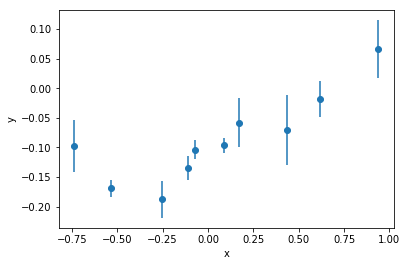

In [21]:
data = np.loadtxt('fitting.txt')
x_obs_training = data[0::2,0]
y_obs_training = data[0::2,1]
y_sigma_obs_training = data[0::2,2]
x_obs_test = data[1::2,0]
y_obs_test = data[1::2,1]
y_sigma_obs_test = data[1::2,2]
plt.errorbar(x_obs_training, y_obs_training, y_sigma_obs_training, fmt='o')
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

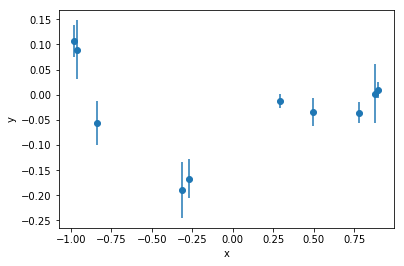

In [22]:
plt.errorbar(x_obs_test, y_obs_test, y_sigma_obs_test, fmt='o')
plt.xlabel('x')
plt.ylabel('y')

/srv/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


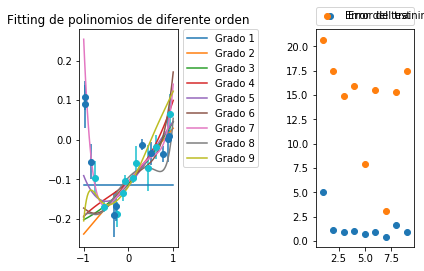

In [50]:
x_training = np.linspace(-1, 1, 100)
MSE1 = []
MSE2 = []
fig = plt.figure()
fittings = fig.add_subplot(131)
for i in range(1,10):
    param, posterior = metropolis(x_obs_training, y_obs_training,y_sigma_obs_training,i)
    model_training = model(x_training, np.mean(param, axis=0))
    Error1 = 1/10*sum(((y_obs_training-model(x_obs_training,np.mean(param, axis=0)))/y_sigma_obs_training)**2)
    Error2 = 1/10*sum(((y_obs_test-model(x_obs_test,np.mean(param, axis=0)))/y_sigma_obs_test)**2)
    MSE1.append(Error1)
    MSE2.append(Error2)
    fittings.plot(x_training, model_training, label='Grado %d' %i)
fittings.errorbar(x_obs_training, y_obs_training, y_sigma_obs_training, fmt='o')
fittings.errorbar(x_obs_test, y_obs_test, y_sigma_obs_test, fmt='o')
fittings.set_title('Fitting de polinomios de diferente orden')
fittings.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

x = [range(1,10)]
MSES = fig.add_subplot(133)
MSES.scatter(x,MSE1, label='Error del training')
MSES.scatter(x,MSE2, label = 'Error del test')
MSES.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)

fig.show()

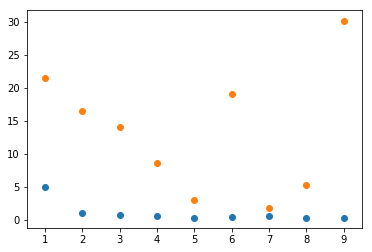